# Olah Data Pemilih

Notebook ini:
- Mengimpor data dari `voters_export_2026-02-25T02-17-01.csv`
- Menentukan prodi dari prefix NIM: `132=EL`, `180=EP`, `183=EB`
- Menentukan angkatan dari 2 digit setelah prefix (contoh `13222xxx` -> EL angkatan 22)
- Menandai `sudah_vote` jika `isVoteCakahim` dan `isVoteCasenat` keduanya `true`
- Membuat 6 visualisasi sesuai permintaan

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
csv_path = "voters_export_2026-02-25T02-17-01.csv"
df = pd.read_csv(csv_path)

# Pastikan NIM berupa string
df["nim"] = df["nim"].astype(str).str.strip()

# Mapping prefix NIM -> prodi
prodi_map = {
    "132": "EL",
    "180": "EP",
    "183": "EB",
}

df["prodi"] = df["nim"].str[:3].map(prodi_map).fillna("Lainnya")
df["angkatan"] = df["nim"].str[3:5]

# Normalisasi kolom vote menjadi boolean
def to_bool(series):
    return series.astype(str).str.strip().str.lower().eq("true")

df["isVoteCakahim_bool"] = to_bool(df["isVoteCakahim"])
df["isVoteCasenat_bool"] = to_bool(df["isVoteCasenat"])
df["sudah_vote"] = df["isVoteCakahim_bool"] & df["isVoteCasenat_bool"]

# Label gabungan prodi-angkatan
df["prodi_angkatan"] = df["prodi"] + "-" + df["angkatan"]

# Agregasi per prodi
agg_prodi = (
    df.groupby("prodi", dropna=False)
      .agg(total_pemilih=("nim", "count"), jumlah_sudah_vote=("sudah_vote", "sum"))
      .reset_index()
)
agg_prodi["persentase_sudah_vote"] = (agg_prodi["jumlah_sudah_vote"] / agg_prodi["total_pemilih"] * 100).round(2)

# Agregasi per prodi + angkatan
agg_prodi_angkatan = (
    df.groupby(["prodi", "angkatan", "prodi_angkatan"], dropna=False)
      .agg(total_pemilih=("nim", "count"), jumlah_sudah_vote=("sudah_vote", "sum"))
      .reset_index()
)
agg_prodi_angkatan["persentase_sudah_vote"] = (
    agg_prodi_angkatan["jumlah_sudah_vote"] / agg_prodi_angkatan["total_pemilih"] * 100
).round(2)

# Filter angkatan khusus 22,23,24
angkatan_filter = ["22", "23", "24"]
agg_22_24 = agg_prodi_angkatan[agg_prodi_angkatan["angkatan"].isin(angkatan_filter)].copy()

print("Ringkasan per prodi:")
display(agg_prodi.sort_values("prodi"))

print("Ringkasan per prodi-angkatan:")
display(agg_prodi_angkatan.sort_values(["prodi", "angkatan"]))

print("Ringkasan khusus angkatan 22,23,24:")
display(agg_22_24.sort_values(["prodi", "angkatan"]))

Ringkasan per prodi:


,prodi,total_pemilih,jumlah_sudah_vote,persentase_sudah_vote
0,EB,166,25,15.06
1,EL,574,170,29.62
2,EP,263,72,27.38


Ringkasan per prodi-angkatan:


,prodi,angkatan,prodi_angkatan,total_pemilih,jumlah_sudah_vote,persentase_sudah_vote
0,EB,15,EB-15,9,0,0.00
1,EB,16,EB-16,31,0,0.00
2,EB,17,EB-17,35,0,0.00
3,EB,18,EB-18,14,0,0.00
4,EB,19,EB-19,15,0,0.00
5,EB,20,EB-20,1,0,0.00
6,EB,22,EB-22,26,2,7.69
7,EB,23,EB-23,23,13,56.52
8,EB,24,EB-24,12,10,83.33
9,EL,13,EL-13,2,0,0.00


Ringkasan khusus angkatan 22,23,24:


,prodi,angkatan,prodi_angkatan,total_pemilih,jumlah_sudah_vote,persentase_sudah_vote
6,EB,22,EB-22,26,2,7.69
7,EB,23,EB-23,23,13,56.52
8,EB,24,EB-24,12,10,83.33
17,EL,22,EL-22,119,22,18.49
18,EL,23,EL-23,113,81,71.68
19,EL,24,EL-24,83,67,80.72
26,EP,22,EP-22,52,5,9.62
27,EP,23,EP-23,57,25,43.86
28,EP,24,EP-24,53,42,79.25


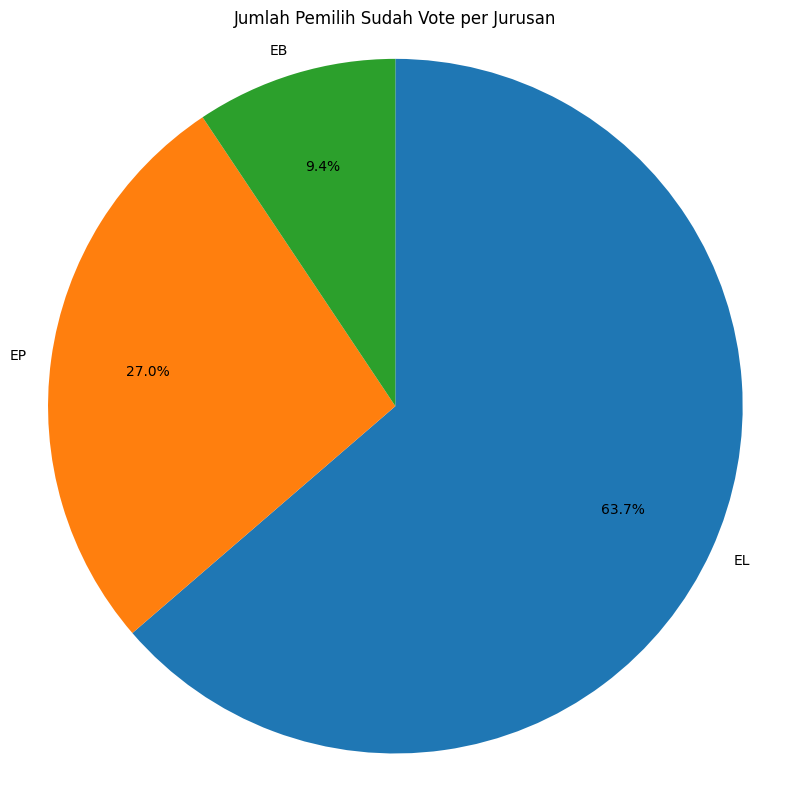

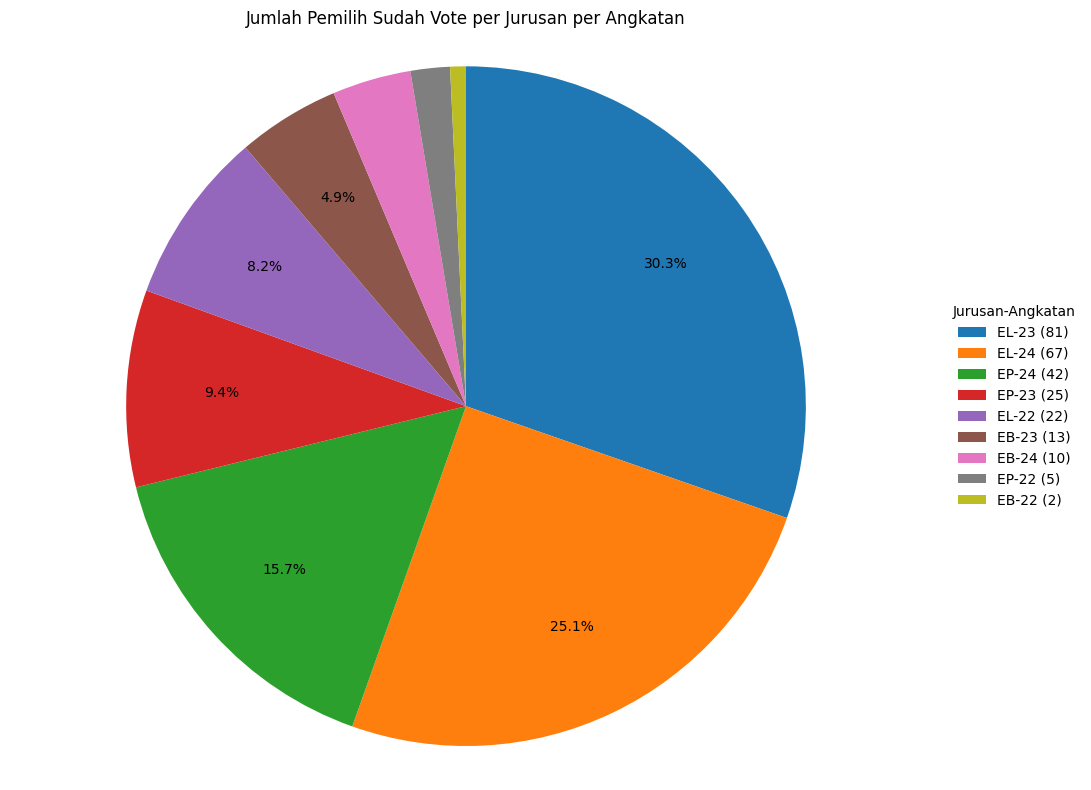

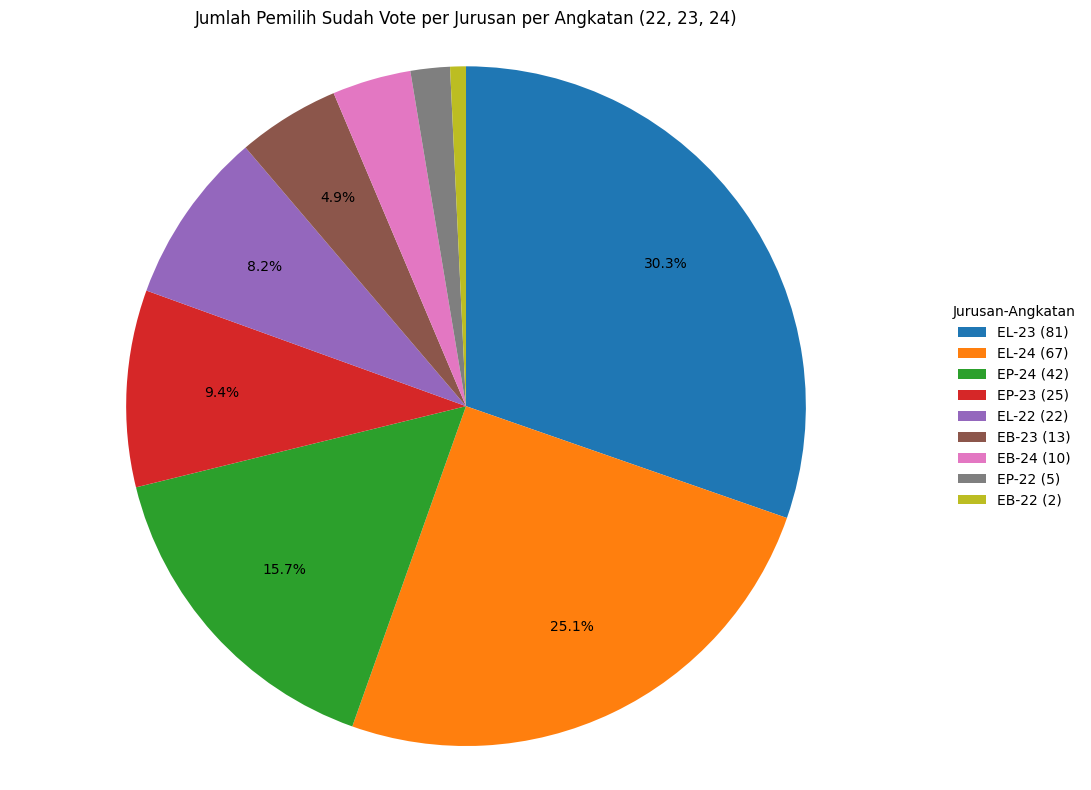

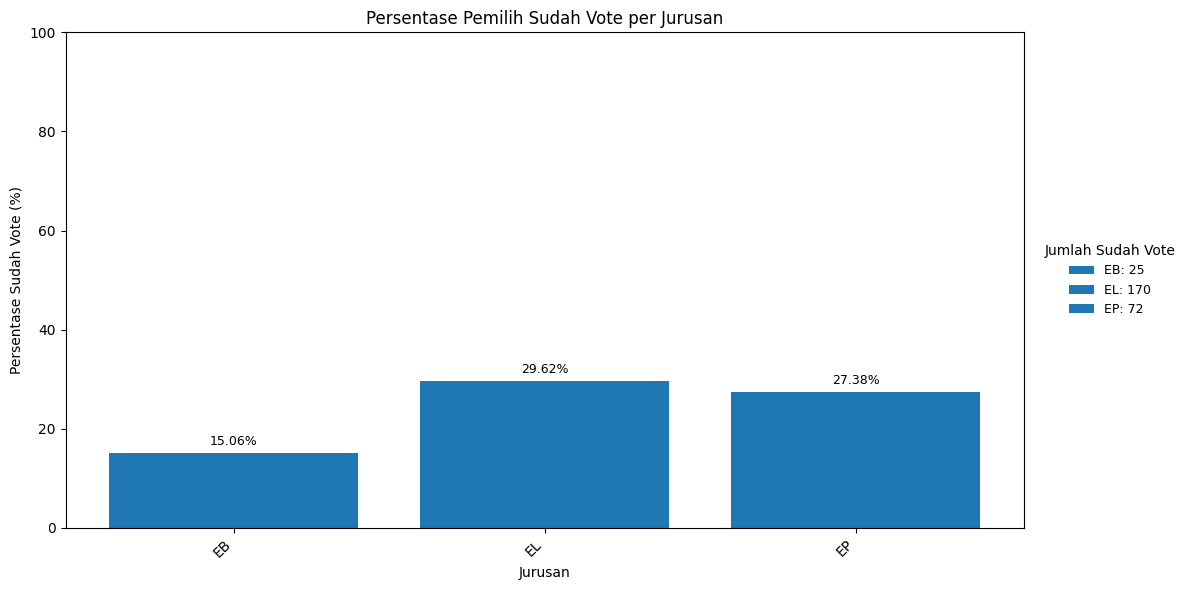

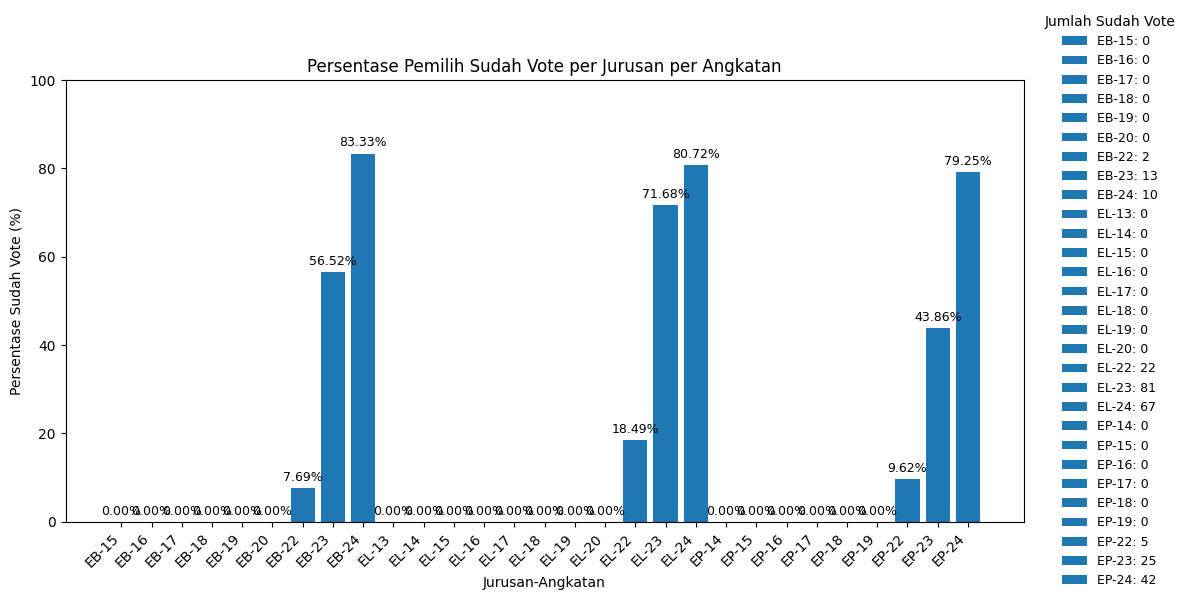

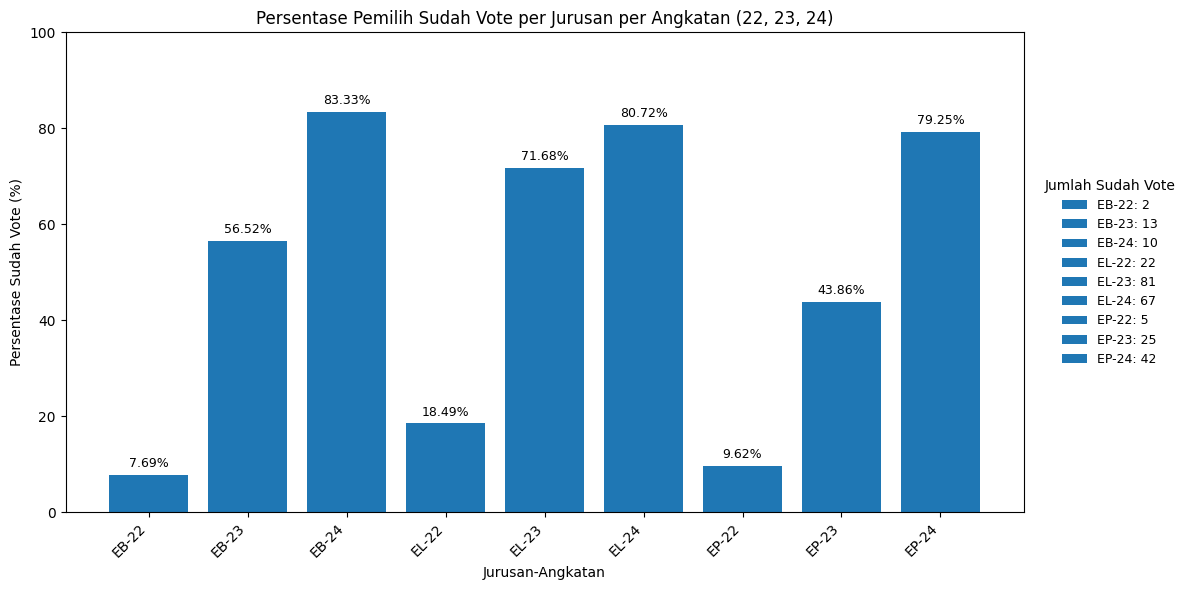

In [9]:
# Helper format persentase di pie chart (hanya tampil jika cukup besar)
def _autopct_threshold(min_pct=3):
    def _formatter(pct):
        return f"{pct:.1f}%" if pct >= min_pct else ""
    return _formatter

# Helper untuk pie chart
def plot_pie(data, labels_col, values_col, title, use_legend=False, legend_title="Kategori", min_pct_label=3, figsize=(8, 8)):
    plot_data = data[data[values_col] > 0].copy().sort_values(values_col, ascending=False)

    fig, ax = plt.subplots(figsize=figsize)
    wedges, texts, autotexts = ax.pie(
        plot_data[values_col],
        labels=None if use_legend else plot_data[labels_col],
        autopct=_autopct_threshold(min_pct=min_pct_label),
        startangle=90,
        counterclock=False,
        pctdistance=0.72,
        labeldistance=1.07
    )

    for text in autotexts:
        text.set_fontsize(10)

    if use_legend:
        legend_labels = [
            f"{label} ({value})"
            for label, value in zip(plot_data[labels_col], plot_data[values_col])
        ]
        ax.legend(
            wedges,
            legend_labels,
            title=legend_title,
            loc="center left",
            bbox_to_anchor=(1.02, 0.5),
            frameon=False
        )

    ax.set_title(title)
    ax.axis("equal")
    plt.tight_layout()
    plt.show()

# Helper untuk bar chart persentase + legenda jumlah vote
def plot_bar_percentage(data, x_col, y_col, count_col, title, xlabel, legend_title="Jumlah Sudah Vote"):
    plot_data = data.copy()

    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(plot_data[x_col], plot_data[y_col])

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Persentase Sudah Vote (%)")
    ax.set_ylim(0, 100)

    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 1,
            f"{height:.2f}%",
            ha="center",
            va="bottom",
            fontsize=9
        )

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

    legend_labels = [
        f"{label}: {int(count)}"
        for label, count in zip(plot_data[x_col], plot_data[count_col])
    ]
    ax.legend(
        bars,
        legend_labels,
        title=legend_title,
        loc="center left",
        bbox_to_anchor=(1.01, 0.5),
        frameon=False,
        fontsize=9,
        title_fontsize=10
    )

    plt.tight_layout()
    plt.show()

# 1) Pie chart jumlah pemilih yang sudah memilih per jurusan
plot_pie(
    agg_prodi,
    labels_col="prodi",
    values_col="jumlah_sudah_vote",
    title="Jumlah Pemilih Sudah Vote per Jurusan",
    use_legend=False,
    min_pct_label=1,
    figsize=(8, 8)
)

# 2) Pie chart jumlah pemilih yang sudah memilih per jurusan per angkatan
plot_pie(
    agg_prodi_angkatan,
    labels_col="prodi_angkatan",
    values_col="jumlah_sudah_vote",
    title="Jumlah Pemilih Sudah Vote per Jurusan per Angkatan",
    use_legend=True,
    legend_title="Jurusan-Angkatan",
    min_pct_label=4,
    figsize=(11, 8)
)

# 3) Pie chart jumlah statistik sudah memilih per jurusan per angkatan (angkatan 22,23,24)
plot_pie(
    agg_22_24,
    labels_col="prodi_angkatan",
    values_col="jumlah_sudah_vote",
    title="Jumlah Pemilih Sudah Vote per Jurusan per Angkatan (22, 23, 24)",
    use_legend=True,
    legend_title="Jurusan-Angkatan",
    min_pct_label=4,
    figsize=(11, 8)
)

# 4) Bar chart persentase pemilih per jurusan
plot_bar_percentage(
    agg_prodi.sort_values("prodi"),
    x_col="prodi",
    y_col="persentase_sudah_vote",
    count_col="jumlah_sudah_vote",
    title="Persentase Pemilih Sudah Vote per Jurusan",
    xlabel="Jurusan"
)

# 5) Bar chart persentase pemilih per jurusan per angkatan
plot_bar_percentage(
    agg_prodi_angkatan.sort_values(["prodi", "angkatan"]),
    x_col="prodi_angkatan",
    y_col="persentase_sudah_vote",
    count_col="jumlah_sudah_vote",
    title="Persentase Pemilih Sudah Vote per Jurusan per Angkatan",
    xlabel="Jurusan-Angkatan"
)

# 6) Bar chart persentase statistik sudah memilih per jurusan per angkatan (angkatan 22,23,24)
plot_bar_percentage(
    agg_22_24.sort_values(["prodi", "angkatan"]),
    x_col="prodi_angkatan",
    y_col="persentase_sudah_vote",
    count_col="jumlah_sudah_vote",
    title="Persentase Pemilih Sudah Vote per Jurusan per Angkatan (22, 23, 24)",
    xlabel="Jurusan-Angkatan"
)